# pandas学习笔记

## 通过pandas读入数据并处理


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt

data = pd.read_csv('/home/tangkun/analyticsvidhya/Airlines.csv')
data.shape
data.dtypes
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' +\
data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + \
data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + \
':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + \
data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])
data

(100, 16)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1129.0,1135,-6.0,1414.0,1436,-22.0,DL,1875,N342NB,LGA,TPA,147.0,1010,11:35:00,14:36:00,11:29:00,14:14:00,2013-11-29
96,1029.0,1029,0.0,1300.0,1344,-44.0,UA,1605,N37465,EWR,LAX,308.0,2454,10:29:00,13:44:00,10:29:00,13:00:00,2013-03-10
97,1724.0,1725,-1.0,1828.0,1845,-17.0,AA,256,N3CTAA,JFK,BOS,40.0,187,17:25:00,18:45:00,17:24:00,18:28:00,2013-11-25
98,930.0,929,1.0,1421.0,1426,-5.0,B6,215,N638JB,EWR,SJU,200.0,1608,9:29:00,14:26:00,9:30:00,14:21:00,2013-03-05


### 通过pandas生成自定义网络结构数据


In [20]:
pd.options.display.max_columns = 20
rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3, 2))
a = ["A", "B", "C"]
b = ["D", "A", "E"]
df = pd.DataFrame(ints, columns=["weight", "cost"])
df['source'] = a
df["destnation"] = b 
df[["weight", "cost",'source', "destnation"]] #打印当前数据流
#将生成数据导入nx中，用于构建图
G = nx.from_pandas_edgelist(df,'source', "destnation", ["weight", "cost"])
G["E"]["C"]["weight"]
G["E"]["C"]["cost"]
edges = pd.DataFrame(
    {
        "source": [0, 1, 2],
         "target": [2, 2, 3],
         "weight": [3, 4, 5],
        "color": ["red", "blue", "blue"],
    })
G = nx.from_pandas_edgelist(edges, edge_attr=True)
G[0][2]["color"]

,weight,cost,source,destnation
0,4,7,A,D
1,7,1,B,A
2,10,9,C,E


10

9

'red'

In [21]:
ints

array([[ 4,  7],
       [ 7,  1],
       [10,  9]])

EdgeDataView([(0, 2, 3), (2, 1, 4), (2, 3, 5)])

EdgeDataView([(0, 2, 'red'), (2, 1, 'blue'), (2, 3, 'blue')])

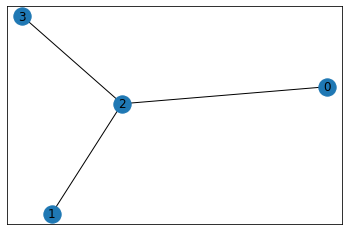

In [23]:
nx.draw_networkx(G)
G.edges.data("weight")
G.edges.data("color")